<h1> Training and Validation Accuracy ~0.04 achieved for acclerometer dataset 1

In [39]:
from keras.layers import Input, Dense

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
from keras.models import Model

In [41]:
from pandas import DataFrame
from pandas import concat
from pandas import Series

In [42]:
# getting the acceloremeter data with timestamps
acc_data1 = pd.read_csv('/Users/tahiyachowdhury/Desktop/0_Accelerometer-352622063881655_1463620750010.csv', header=0, usecols = ['x', 'y', 'z', 'timestamps'])


In [43]:
print acc_data1

              x         y         z           timestamps
0     -0.476446  3.175310  8.787319  1463620749338258490
1     -0.442329  3.156755  8.812458  1463620749340873125
2     -0.414197  3.176507  8.864532  1463620749343618854
3     -0.393248  3.173514  8.891466  1463620749350410573
4     -0.411204  3.143587  8.878299  1463620749354380677
5     -0.411803  3.106477  8.839393  1463620749359885313
6     -0.396839  3.086724  8.851962  1463620749364133698
7     -0.385466  3.075951  8.851364  1463620749369866928
8     -0.374094  3.058593  8.875306  1463620749373755417
9     -0.393248  3.070564  8.875306  1463620749379595521
10    -0.410007  3.103484  8.890868  1463620749383273021
11    -0.406416  3.116652  8.935161  1463620749388788959
12    -0.434548  3.138799  9.007586  1463620749394023959
13    -0.452504  3.153164  9.023148  1463620749399554115
14    -0.457891  3.130419  9.036316  1463620749403664636
15    -0.477045  3.131017  9.053674  1463620749409213178
16    -0.474052  3.124433  9.05

In [44]:
acc_data1 = acc_data1.values

In [45]:
print acc_data1  ## now acc_data1 is an nd array converted from a dataframe

[[-4.76446150e-01  3.17531000e+00  8.78731900e+00  1.46362075e+18]
 [-4.42328750e-01  3.15675500e+00  8.81245800e+00  1.46362075e+18]
 [-4.14196900e-01  3.17650700e+00  8.86453150e+00  1.46362075e+18]
 ...
 [-6.33864900e-01 -9.76894200e+00  6.26682300e-01  1.46362087e+18]
 [-6.51821430e-01 -9.74978800e+00  6.34463400e-01  1.46362087e+18]
 [-6.64391000e-01 -9.76894200e+00  6.29675030e-01  1.46362087e+18]]


In [46]:
acc_data1= acc_data1[:, [0, 1, 2, 3]]

In [47]:
print acc_data1

[[-4.76446150e-01  3.17531000e+00  8.78731900e+00  1.46362075e+18]
 [-4.42328750e-01  3.15675500e+00  8.81245800e+00  1.46362075e+18]
 [-4.14196900e-01  3.17650700e+00  8.86453150e+00  1.46362075e+18]
 ...
 [-6.33864900e-01 -9.76894200e+00  6.26682300e-01  1.46362087e+18]
 [-6.51821430e-01 -9.74978800e+00  6.34463400e-01  1.46362087e+18]
 [-6.64391000e-01 -9.76894200e+00  6.29675030e-01  1.46362087e+18]]


In [48]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

# Normalizing Example  (mean 0, std 1)
#norm = StandardScaler()
#acc_data1_normalized = norm.fit_transform(acc_data1)

scaler = MinMaxScaler(feature_range=(0.01, 0.99))
acc_data1_normalized = scaler.fit_transform(acc_data1[:, :4]) #normalizing process

In [49]:
acc_data1_normalized.shape

(24114, 4)

In [50]:
print acc_data1_normalized

[[0.21678626 0.84663789 0.59561882 0.01      ]
 [0.21809941 0.84595668 0.59653467 0.01002141]
 [0.21918218 0.84668183 0.59843177 0.0100439 ]
 ...
 [0.21072735 0.37141576 0.2983174  0.98992212]
 [0.21003622 0.37211896 0.29860087 0.98997015]
 [0.20955242 0.37141576 0.29842643 0.99      ]]


In [51]:
from keras.models import Model, Sequential
import numpy as np
import keras
from keras.layers import Input, Dense, Flatten, Reshape

In [52]:
acc_data1 = acc_data1_normalized.astype(np.float32)  ##converting data to float32
print acc_data1
print acc_data1.dtype

[[0.21678625 0.8466379  0.59561884 0.01      ]
 [0.2180994  0.8459567  0.59653467 0.01002141]
 [0.21918218 0.84668183 0.59843177 0.0100439 ]
 ...
 [0.21072735 0.37141576 0.2983174  0.9899221 ]
 [0.21003622 0.37211895 0.29860088 0.98997015]
 [0.20955242 0.37141576 0.29842642 0.99      ]]
float32


In [53]:
from itertools import islice
n=100
acc_windows = np.array(zip(*[islice(acc_data1[:, :3], i, None, 1) for i in range(n)]))

In [54]:
print acc_windows


[[[0.21678625 0.8466379  0.59561884]
  [0.2180994  0.8459567  0.59653467]
  [0.21918218 0.84668183 0.59843177]
  ...
  [0.23337339 0.84771466 0.60335994]
  [0.23385718 0.84729713 0.60512614]
  [0.23376504 0.8475608  0.6071105 ]]

 [[0.2180994  0.8459567  0.59653467]
  [0.21918218 0.84668183 0.59843177]
  [0.2199885  0.846572   0.59941304]
  ...
  [0.23385718 0.84729713 0.60512614]
  [0.23376504 0.8475608  0.6071105 ]
  [0.23406452 0.84854966 0.6090512 ]]

 [[0.21918218 0.84668183 0.59843177]
  [0.2199885  0.846572   0.59941304]
  [0.21929736 0.84547323 0.59893334]
  ...
  [0.23376504 0.8475608  0.6071105 ]
  [0.23406452 0.84854966 0.6090512 ]
  [0.23401845 0.8486596  0.610316  ]]

 ...

 [[0.21026659 0.3695699  0.2927351 ]
  [0.21031266 0.36904252 0.2923208 ]
  [0.2100823  0.3692403  0.29304036]
  ...
  [0.21178707 0.37178937 0.29814294]
  [0.21049698 0.37134987 0.2972489 ]
  [0.21072735 0.37141576 0.2983174 ]]

 [[0.21031266 0.36904252 0.2923208 ]
  [0.2100823  0.3692403  0.29304036]


In [55]:
acc_windows.shape

(24015, 100, 3)

In [56]:
import numpy

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
train, test = train_test_split(acc_windows, test_size=0.20, shuffle= True)

In [59]:
#train, test = acc_windows[:20000,:], acc_windows[20000:,:]

In [60]:
test.shape

(4803, 100, 3)

In [61]:
train.shape

(19212, 100, 3)

In [62]:
train = train.reshape((len(train), np.prod(train.shape[1:]))) ##changing the shape of training and testing set to create feature vectors
test = test.reshape((len(test), np.prod(test.shape[1:])))


In [63]:
train.shape


(19212, 300)

In [64]:
test.shape

(4803, 300)

In [65]:
print train

[[0.19245847 0.85507613 0.5918028  ... 0.10556032 0.9251091  0.54683906]
 [0.26304594 0.5006922  0.31007078 ... 0.35533488 0.4761466  0.3175938 ]
 [0.16398388 0.94530374 0.57488143 ... 0.1816538  0.9179454  0.5106631 ]
 ...
 [0.5165065  0.44896406 0.39127588 ... 0.52118313 0.41624394 0.35150197]
 [0.26827547 0.34779313 0.25071517 ... 0.22296035 0.36651546 0.31294915]
 [0.37415668 0.78433996 0.5485181  ... 0.51074713 0.37611833 0.59712344]]


In [66]:
print test

[[0.20757118 0.37066865 0.2857572  ... 0.19801055 0.36842722 0.29149216]
 [0.20298669 0.370383   0.293084   ... 0.19708903 0.37310782 0.29288775]
 [0.21187922 0.8647889  0.6059112  ... 0.1843492  0.88258827 0.6080264 ]
 ...
 [0.20469147 0.37200907 0.2967474  ... 0.20526741 0.36985558 0.29567888]
 [0.23282048 0.8486376  0.60133195 ... 0.2323367  0.84672576 0.5950518 ]
 [0.15016128 0.486167   0.34216905 ... 0.34547475 0.45929208 0.29561347]]


In [67]:
##We have the input matrix with accelerometer data with overlapped window

In [68]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

In [69]:
#Automatic Feature extraction

# this is the size of our encoded representations
#encoding_dim = 30 #compression of factor 15, assuming the input is 784 float32

# 300 = 3 X 100
# this is our input placeholder where the sensor data will be passed

input_img = Input(shape=(300,))

# "encoded" is the encoded representation of the input
encoded = Dense(16, activation='sigmoid')(input_img) # layer 1 encoder
#encoded = Dense(16, activation='sigmoid')(encoded)    #layer 2 encoder 
#encoded = Dense(32, activation='sigmoid')(encoded)    #layer 2 encoder 

# "decoded" is the lossy reconstruction of the input
#decoded = Dense(64, activation='sigmoid')(encoded)
decoded = Dense(300, activation='sigmoid')(encoded)     # layer 2 decoder
#decoded = Dense(300, activation='sigmoid')(decoded)  # layer 1 encoder

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
#encoder = Model (input_img, encoded)

In [70]:
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(16,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))


Set 1: adadelta, binary_crossentropy, window_size=500, codebook = 15
The performance was negative loss in the beginning and saturated to ~-48.000 after around 8 epochs
I normalized the data, added regulizer and this time loss reached 0.0215 within 7 epochs

I chaged normalization with min_max_scaler and after 7 epochs the validation loss stabilizes 0.6579

Used mean_squared_error for loss metric, val_loss: 0.0273 and stuck at this value



In [71]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

hist = autoencoder.fit(train, train,
                epochs=50,
                batch_size=128,
                shuffle=False,
                validation_data=(test, test))

Train on 19212 samples, validate on 4803 samples
Epoch 1/50
19212/19212 [==============================] - 1s 28us/step - loss: 0.0268 - val_loss: 0.0172
Epoch 2/50
19212/19212 [==============================] - 0s 17us/step - loss: 0.0133 - val_loss: 0.0114
Epoch 3/50
19212/19212 [==============================] - 0s 17us/step - loss: 0.0105 - val_loss: 0.0100
Epoch 4/50
19212/19212 [==============================] - 0s 17us/step - loss: 0.0092 - val_loss: 0.0088
Epoch 5/50
19212/19212 [==============================] - 0s 21us/step - loss: 0.0083 - val_loss: 0.0080
Epoch 6/50
19212/19212 [==============================] - 0s 19us/step - loss: 0.0076 - val_loss: 0.0074
Epoch 7/50
19212/19212 [==============================] - 1s 26us/step - loss: 0.0071 - val_loss: 0.0069
Epoch 8/50
19212/19212 [==============================] - 0s 17us/step - loss: 0.0066 - val_loss: 0.0065
Epoch 9/50
19212/19212 [==============================] - 0s 23us/step - loss: 0.0062 - val_loss: 0.0061
Epoch 

In [72]:
encoded_imgs = encoder.predict(test)   ##validation on test set
decoded_imgs = decoder.predict(encoded_imgs)

In [73]:
import matplotlib.pyplot as plt

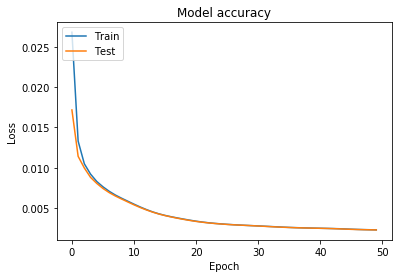

In [152]:
# Plot training & validation accuracy values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [153]:
encoded_imgs.shape

(4803, 16)

In [154]:
print encoded_imgs[0]

[0.1121999  0.5956885  0.3556069  0.2955487  0.97203934 0.37792668
 0.28378454 0.00317485 0.99970347 0.68488264 0.981625   0.5210457
 0.7339122  0.8831208  0.2823196  0.56200916]


In [155]:
print (len(encoded_imgs))

4803


In [197]:
test_inverse.shape

(24114, 4)

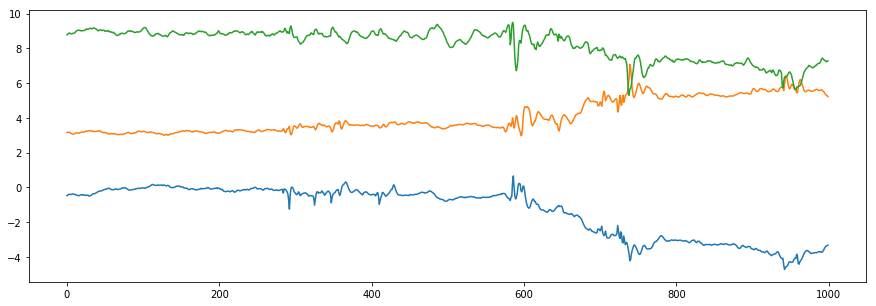

In [199]:
#plt.plot(hist.history['val_loss'])
plt.figure(figsize=(15, 5))
plt.plot(test_inverse[:1000, 0:3])

plt.show()

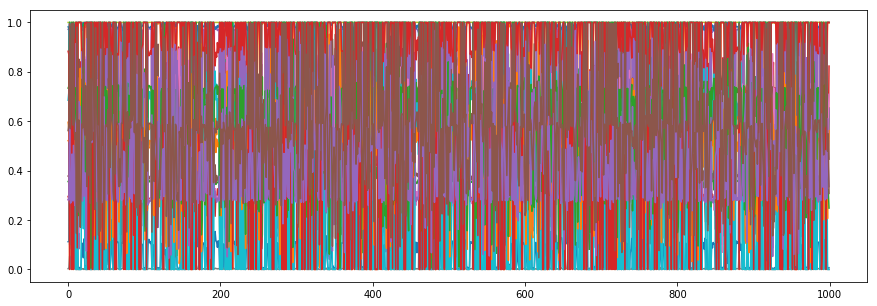

In [200]:
plt.figure(figsize=(15, 5))
plt.plot(encoded_imgs[:1000, 0:16])

plt.show()

In [51]:
decoded_imgs.shape

(4803, 300)

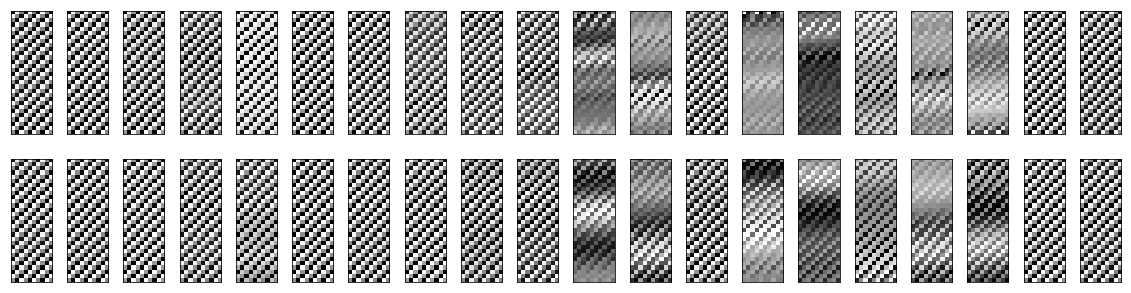

In [102]:
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(20, 5))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test[i].reshape(30, 10))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(30, 10))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [45]:
import numpy as np
import matplotlib.pyplot as plt

encoder = Model(input_img, encoded)
test_encoded = encoder.predict(test, batch_size=256)
#print test_encoded

#ax = plt.figure(figsize=(20, 6))
plt.figure(figsize=(6, 6))
plt.scatter(test_encoded[:, 0], test_encoded[:, 1], cmap='brg')
plt.colorbar(test_encoded)
plt.show()

<H1> LSTM based and Variational autoencoder to see whether it improves the performance of the model

from keras.layers import Input, LSTM, RepeatVector
from keras.models import Model

inputs = Input(shape=(19212, 300))
encoded = LSTM(30)(inputs)

decoded = RepeatVector(19212)(encoded)
decoded = LSTM(300, return_sequences=True)(decoded)

sequence_autoencoder = Model(inputs, decoded)
encoder = Model(inputs, encoded)

sequence_autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics = ['acc'])

hist = sequence_autoencoder.fit(train, train,
                epochs=50,
                batch_size=256,
                shuffle=False,
                validation_data= None)

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

TRy LSTM AND VARIATIONAL
clustering
Breakpoint detection